# <h1><b>Module 3</h1>

<h2><b>Understanding Underfitting and Overfitting </b><h2>

Below graph represent underfit (High Variance), Good fit and Overfit (High Bias) models.  

In [1]:
#importing necessary values
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras 
import seaborn as sns 

In [2]:
plt.rcParams["figure.figsize"] = (12,10)

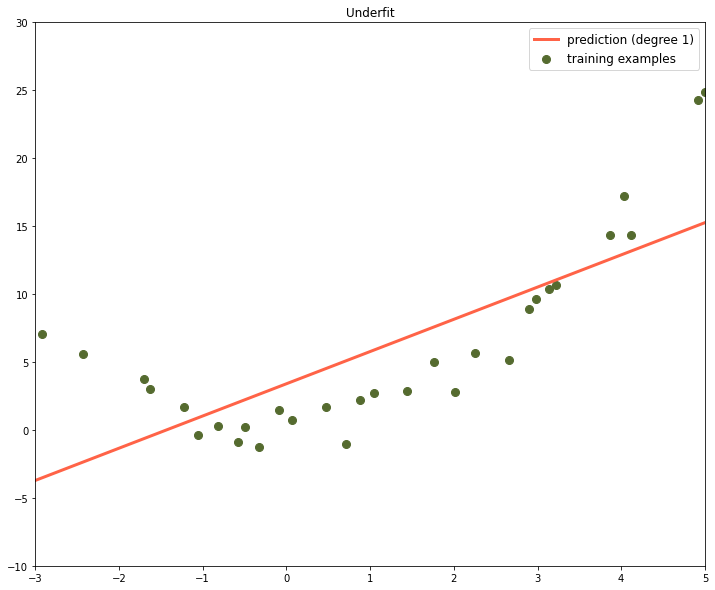

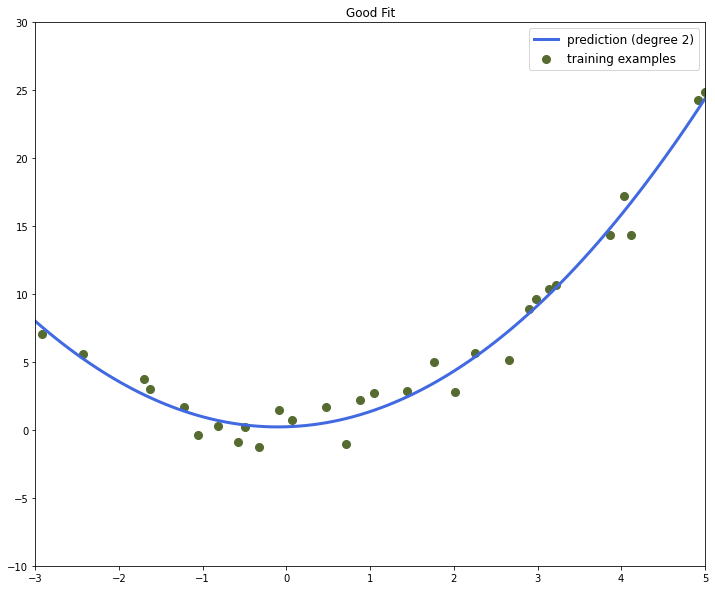

C:\Users\Zeel\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.72661e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


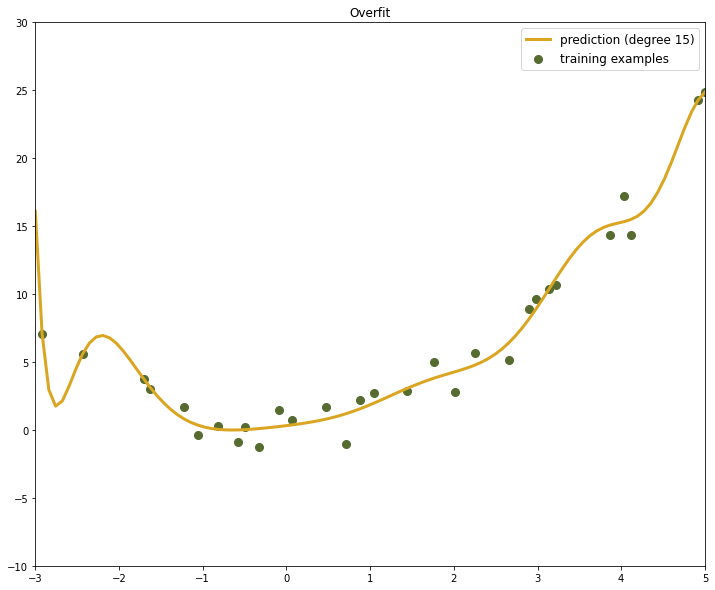

In [3]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = np.linspace(-3, 5, 100)

np.random.shuffle(X)
X = np.sort(X[:30])
noise = [(-3 + np.random.random()*5) for i in range(len(X))]
y = X * X + noise

X = np.expand_dims(X, axis=1)

x_plot = np.linspace(-3, 5, 100)
y_test = np.expand_dims(x_plot, axis=1)

colors = ['tomato', 'royalblue', 'goldenrod']
lw = 3

fit = ["Underfit", "Good Fit", "Overfit"]
for count, degree in enumerate([1, 2, 15]):
    plt.xlim([-3, 5])
    plt.ylim([-10, 30])
    plt.scatter(X, y, color='darkolivegreen', s=64, marker='o', label="training examples")
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_pred = model.predict(y_test)
    plt.plot(x_plot, y_pred, color=colors[count], linewidth=lw,
             label=f'prediction (degree {degree})')

    plt.legend(loc='upper right', prop={'size': 12})
    plt.title(fit[count])
    plt.show()

## **Understanding the data**

In [4]:
df = pd.read_csv('DL_3_Module_Heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.shape

(303, 14)

In [8]:
#Checking if any null value is present 
df.isnull().values.any()

False

<AxesSubplot:xlabel='target', ylabel='count'>

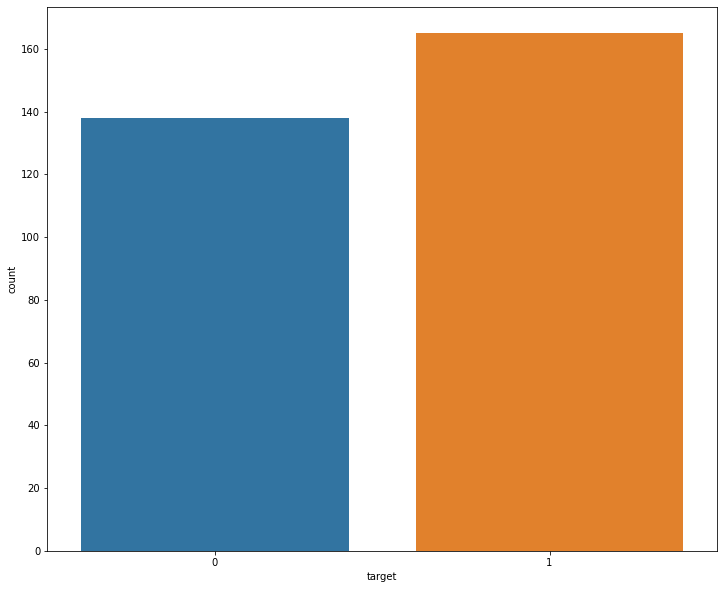

In [9]:
sns.countplot(x = 'target', data = df)

## **Underfitting**

Here only 1 feature that is the trestbps is used to predict the target value 


In [10]:
from sklearn.model_selection import train_test_split

X = df[['trestbps']]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Unit is hidden layer, and input node is equal to cols in this code.
#loss = "binary_crossentropy" is used when traget or out have value of 0 or 1.
def build_classifier(train_data):
  model = keras.Sequential([
    keras.layers.Dense(units=32, activation='relu', input_shape=[train_data.shape[1]]),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=1),
  ])

  model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
  )

  return model

In [12]:
model = build_classifier(X_train)

In [13]:
#batch_size: Integer or `None`.
#       Number of samples per gradient update.
BATCH_SIZE = 32

history = model.fit(
  x=X_train,
  y=y_train,
  shuffle=True,
  epochs=100,
  validation_split=0.2,
  batch_size=BATCH_SIZE,
  verbose=1
)

Epoch 1/100
7/7 [==============================] - 1s 36ms/step - loss: 6.9530 - accuracy: 0.5440 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 6.9530 - accuracy: 0.5440 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 6.9530 - accuracy: 0.5440 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 6.9530 - accuracy: 0.5440 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 6.9530 - accuracy: 0.5440 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 6.9530 - accuracy: 0.5440 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 6.9530 - accuracy: 0.5440 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 8/100
7/7 [=========

In [14]:
#Function to create a graph to understand to compare accuracy and val_accuracy
def plot_accuracy(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
            label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'],
            label = 'Val Accuracy')
  plt.ylim((0, 1))
  plt.legend()
  plt.show()

Here we see that the model is underfit because the model is not predicting accurately and is performing poorly on training dataset.

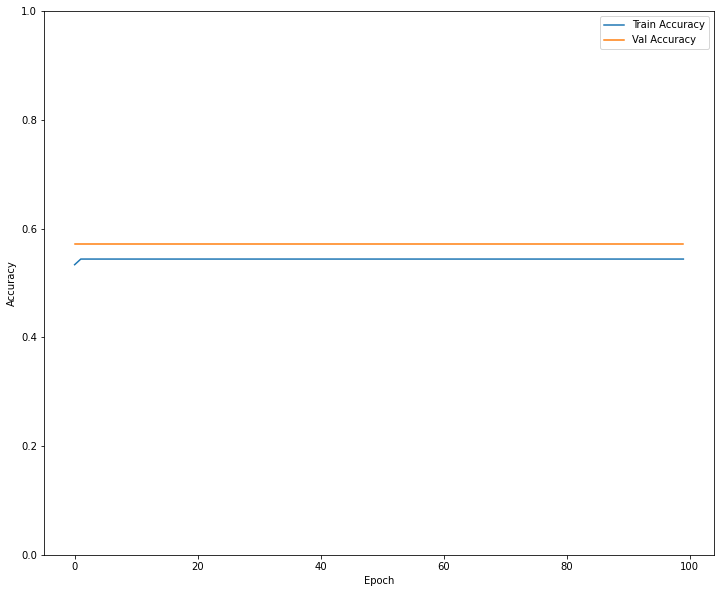

In [18]:
plot_accuracy(history)

To improve the accuracy of the model, here we are adding more features so that the model can predict more accurately and improve its performance over the training dataset.

In [15]:
X = pd.get_dummies(df[['oldpeak', 'cp']], columns=["cp"])
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = build_classifier(X_train)
history = model.fit(
  x=X_train,
  y=y_train,
  shuffle=True,
  epochs=100,
  validation_split=0.2,
  batch_size=BATCH_SIZE,
  verbose=1
)

Epoch 1/100
7/7 [==============================] - 1s 21ms/step - loss: 3.8958 - accuracy: 0.4352 - val_loss: 2.1222 - val_accuracy: 0.4490
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 2.0987 - accuracy: 0.3990 - val_loss: 1.0956 - val_accuracy: 0.5102
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 1.4971 - accuracy: 0.3990 - val_loss: 0.9688 - val_accuracy: 0.4898
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 1.3173 - accuracy: 0.3782 - val_loss: 0.9148 - val_accuracy: 0.4898
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 1.3322 - accuracy: 0.3731 - val_loss: 0.8830 - val_accuracy: 0.4898
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 1.3070 - accuracy: 0.3782 - val_loss: 0.8620 - val_accuracy: 0.4898
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 1.2865 - accuracy: 0.3782 - val_loss: 0.8441 - val_accuracy: 0.4898
Epoch 8/100
7/7 [=========

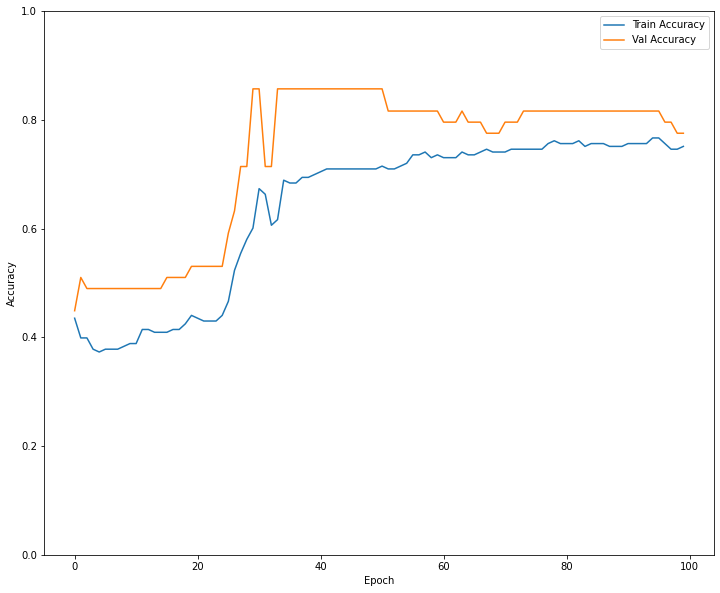

In [17]:
plot_accuracy(history)

Another method to improve the accuracy and handle underfitting model is by creating a denser neural network. 

In [18]:
model = keras.Sequential([
  keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
  keras.layers.Dropout(rate=0.2),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dropout(rate=0.2),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='linear'),
])

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
  )

In [19]:
history = model.fit(
  x=X_train,
  y=y_train,
  shuffle=True,
  epochs=200,
  validation_split=0.2,
  batch_size=BATCH_SIZE,
  verbose=0
)

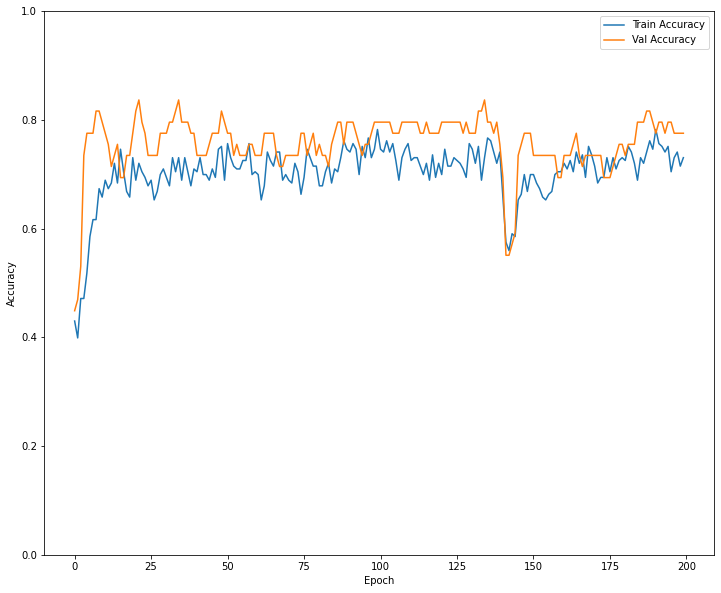

In [20]:
plot_accuracy(history)

## **Overfitting**

In [21]:
X = df[['oldpeak', 'age', 'exang', 'ca', 'thalach']]
X = pd.get_dummies(X, columns=['exang', 'ca', 'thalach'])
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
def build_classifier():

  model = keras.Sequential([
    keras.layers.Dense(units=16, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(units=1, activation='sigmoid'),
  ])

  model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
  )

  return model

Here only 5 percent of the data is used to train the model and remaining data is considered to be as validation data. 

In [23]:
model = build_classifier()

history = model.fit(
  x=X_train,
  y=y_train,
  shuffle=True,
  epochs=500,
  validation_split=0.95, #95% of data is Validation Data. 
  batch_size=BATCH_SIZE,
  verbose=1
)

Epoch 1/500
1/1 [==============================] - 0s 434ms/step - loss: 9.4355 - accuracy: 0.4167 - val_loss: 9.3016 - val_accuracy: 0.4522
Epoch 2/500
1/1 [==============================] - 0s 39ms/step - loss: 9.3267 - accuracy: 0.4167 - val_loss: 9.1946 - val_accuracy: 0.4522
Epoch 3/500
1/1 [==============================] - 0s 34ms/step - loss: 9.2181 - accuracy: 0.4167 - val_loss: 9.0879 - val_accuracy: 0.4522
Epoch 4/500
1/1 [==============================] - 0s 24ms/step - loss: 9.1099 - accuracy: 0.4167 - val_loss: 8.9816 - val_accuracy: 0.4522
Epoch 5/500
1/1 [==============================] - 0s 32ms/step - loss: 9.0021 - accuracy: 0.4167 - val_loss: 8.8756 - val_accuracy: 0.4522
Epoch 6/500
1/1 [==============================] - 0s 32ms/step - loss: 8.8945 - accuracy: 0.4167 - val_loss: 8.7699 - val_accuracy: 0.4522
Epoch 7/500
1/1 [==============================] - 0s 32ms/step - loss: 8.7873 - accuracy: 0.4167 - val_loss: 8.6645 - val_accuracy: 0.4522
Epoch 8/500
1/1 [==

Here it is evident that the model works well on the training dataset but works poorly on the validation data. Thus we can conclude that the model is Overfitting. 

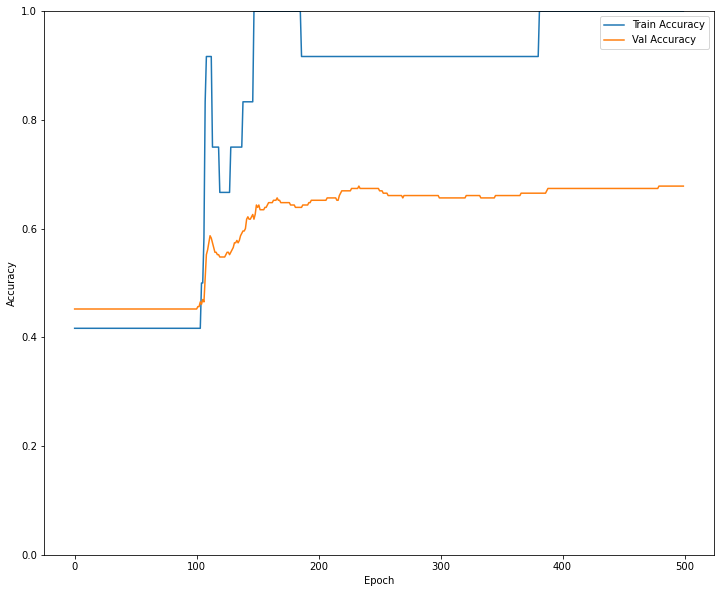

In [24]:
plot_accuracy(history)

Here we are increase the size of the training data and using 80% of data to train the model. Thus we are providing more data to handle overfitting. 

In [25]:
model = build_classifier()

history = model.fit(
  x=X_train,
  y=y_train,
  shuffle=True,
  epochs=500,
  validation_split=0.2, #20% of Data for validation
  batch_size=BATCH_SIZE,
  verbose=1
)

Epoch 1/500
7/7 [==============================] - 0s 22ms/step - loss: 0.7325 - accuracy: 0.4663 - val_loss: 0.6826 - val_accuracy: 0.5510
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5648 - val_loss: 0.7041 - val_accuracy: 0.4490
Epoch 3/500
7/7 [==============================] - 0s 5ms/step - loss: 0.7005 - accuracy: 0.4663 - val_loss: 0.7123 - val_accuracy: 0.4694
Epoch 4/500
7/7 [==============================] - 0s 5ms/step - loss: 0.7028 - accuracy: 0.4819 - val_loss: 0.7039 - val_accuracy: 0.4490
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6773 - accuracy: 0.5130 - val_loss: 0.6695 - val_accuracy: 0.6327
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6528 - accuracy: 0.5959 - val_loss: 0.6524 - val_accuracy: 0.6939
Epoch 7/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6387 - accuracy: 0.7098 - val_loss: 0.6405 - val_accuracy: 0.6735
Epoch 8/500
7/7 [=========

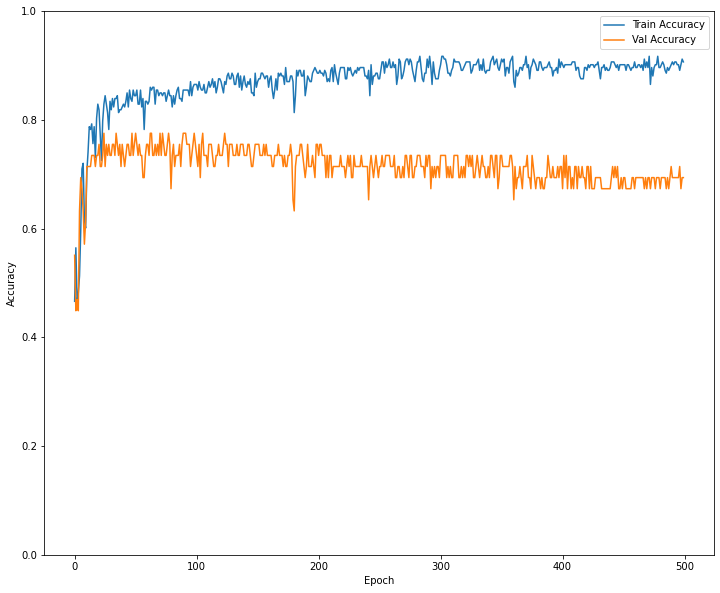

In [26]:
plot_accuracy(history)

Now we will check the overfitting of model for a deeper neural network. 

In [27]:
def build_classifier():
  model = keras.Sequential([
    keras.layers.Dense(units=128, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid'),
  ])

  model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
  )

  return model

In [28]:
model = build_classifier()

history = model.fit(
  x=X_train,
  y=y_train,
  shuffle=True,
  epochs=200,
  validation_split=0.2,
  batch_size=BATCH_SIZE,
  verbose=1
)

Epoch 1/200
7/7 [==============================] - 1s 26ms/step - loss: 0.6763 - accuracy: 0.5440 - val_loss: 0.6545 - val_accuracy: 0.7347
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 0.7314 - accuracy: 0.5026 - val_loss: 0.6643 - val_accuracy: 0.6327
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6969 - accuracy: 0.5699 - val_loss: 0.7161 - val_accuracy: 0.5714
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.5803 - val_loss: 0.7156 - val_accuracy: 0.4286
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 0.7667 - accuracy: 0.4560 - val_loss: 0.7582 - val_accuracy: 0.4286
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6672 - accuracy: 0.5699 - val_loss: 0.6356 - val_accuracy: 0.6939
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6290 - accuracy: 0.7772 - val_loss: 0.6322 - val_accuracy: 0.7143
Epoch 8/200
7/7 [=========

Here due to the difference between the training accuracy and validation accuracy we can say the model is overfitting. This is because model performance better only on training data 

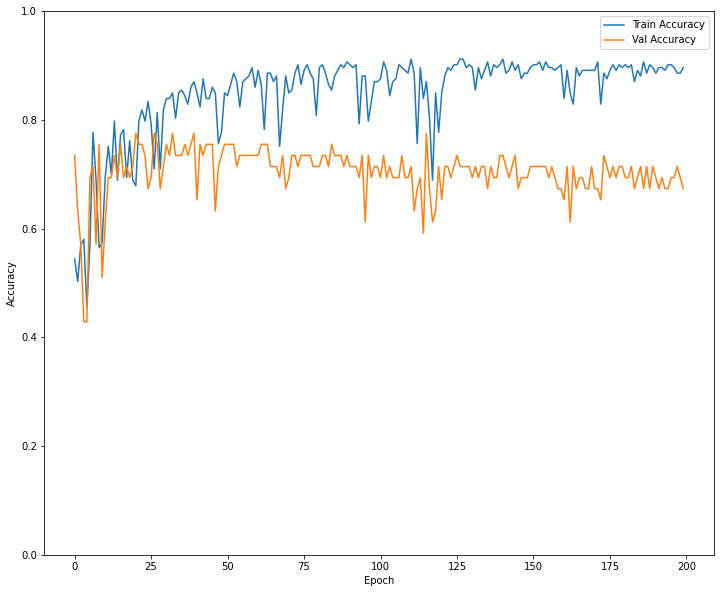

In [29]:
plot_accuracy(history)

**To handle overfitting the first solution is early stopping.**

In [30]:
model = build_classifier()

early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=25)

history = model.fit(
  x=X_train,
  y=y_train,
  shuffle=True,
  epochs=200,
  validation_split=0.2,
  batch_size=BATCH_SIZE,
  verbose=1,
  callbacks=[early_stop]
)

Epoch 1/200
7/7 [==============================] - 1s 26ms/step - loss: 0.7001 - accuracy: 0.5130 - val_loss: 0.6637 - val_accuracy: 0.5714
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6888 - accuracy: 0.5078 - val_loss: 0.6944 - val_accuracy: 0.5714
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6902 - accuracy: 0.5440 - val_loss: 0.6831 - val_accuracy: 0.5714
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6945 - accuracy: 0.5440 - val_loss: 0.6843 - val_accuracy: 0.5714
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 0.6917 - accuracy: 0.5544 - val_loss: 0.6767 - val_accuracy: 0.5714
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6746 - accuracy: 0.5440 - val_loss: 0.6742 - val_accuracy: 0.5714
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6800 - accuracy: 0.5440 - val_loss: 0.6715 - val_accuracy: 0.5714
Epoch 8/200
7/7 [=========

This model performance better on validation data

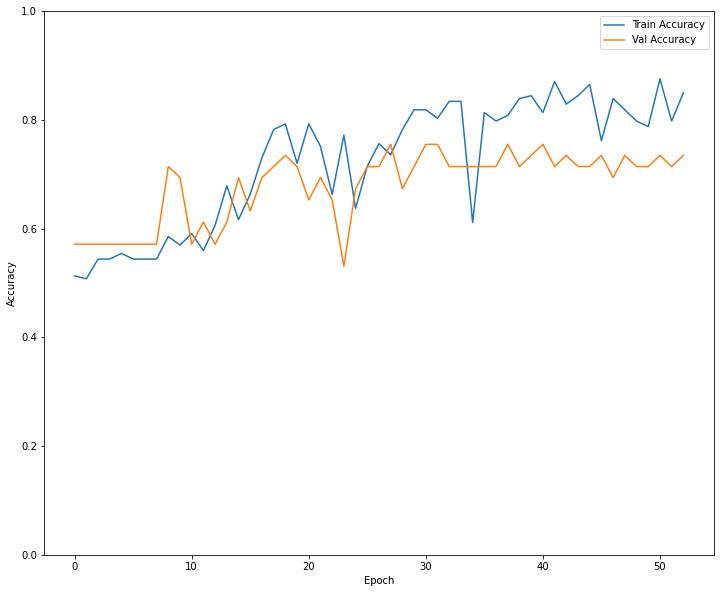

In [31]:
plot_accuracy(history)

**Here another method to handle Overfitting is to add dropout layers.**

In [32]:
model = keras.Sequential([
    keras.layers.Dense(units=128, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid'),
  ])

model.compile(
  loss="binary_crossentropy",
  optimizer="adam",
  metrics=['accuracy']
)

In [33]:
history = model.fit(
  x=X_train,
  y=y_train,
  shuffle=True,
  epochs=200,
  validation_split=0.2,
  batch_size=BATCH_SIZE,
  verbose=1
)

Epoch 1/200
7/7 [==============================] - 1s 28ms/step - loss: 0.9884 - accuracy: 0.5337 - val_loss: 0.6906 - val_accuracy: 0.5714
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 0.8249 - accuracy: 0.5078 - val_loss: 0.6854 - val_accuracy: 0.5714
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.8308 - accuracy: 0.5130 - val_loss: 0.6932 - val_accuracy: 0.5714
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 0.7947 - accuracy: 0.5181 - val_loss: 0.6887 - val_accuracy: 0.5714
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 0.7445 - accuracy: 0.5285 - val_loss: 0.6882 - val_accuracy: 0.5714
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.7815 - accuracy: 0.4922 - val_loss: 0.6893 - val_accuracy: 0.5714
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 0.7360 - accuracy: 0.5078 - val_loss: 0.6928 - val_accuracy: 0.5918
Epoch 8/200
7/7 [=========

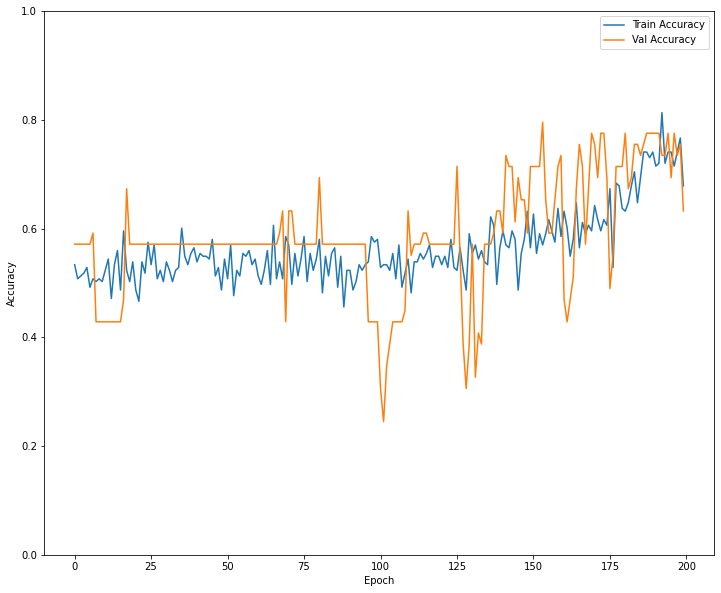

In [34]:
plot_accuracy(history)